# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
#1
df = pd.read_csv('txdata.csv',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,29.03
1,NaN,"Jan 02, 1979",1979/01/02,31.35
2,NaN,"Jan 03, 1979",1979/01/03,41.66
3,NaN,"Jan 04, 1979",1979/01/04,47.30
4,NaN,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,59.91
12050,NaN,"Dec 29, 2011",2011/12/29,66.64
12051,NaN,"Dec 30, 2011",2011/12/30,68.61
12052,NaN,"Dec 31, 2011",2011/12/31,73.49


In [4]:
#Answer 1) ABOVE

### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [5]:
#2
df=df[df['Notes']!= 'Total']

In [6]:
df=df.drop('Notes',axis=1)

In [7]:
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",1979/01/01,29.03
1,"Jan 02, 1979",1979/01/02,31.35
2,"Jan 03, 1979",1979/01/03,41.66
3,"Jan 04, 1979",1979/01/04,47.30
4,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67
12049,"Dec 28, 2011",2011/12/28,59.91
12050,"Dec 29, 2011",2011/12/29,66.64
12051,"Dec 30, 2011",2011/12/30,68.61


In [8]:
#Answer 2) ABOVE

>3) Make a column called Date that is in the pandas datetime format

In [9]:
#3
import pandas as pd
df['Date']=pd.to_datetime(df['Month Day, Year'], format='%b %d, %Y')

In [10]:
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date
0,"Jan 01, 1979",1979/01/01,29.03,1979-01-01
1,"Jan 02, 1979",1979/01/02,31.35,1979-01-02
2,"Jan 03, 1979",1979/01/03,41.66,1979-01-03
3,"Jan 04, 1979",1979/01/04,47.30,1979-01-04
4,"Jan 05, 1979",1979/01/05,46.89,1979-01-05
...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67,2011-12-27
12049,"Dec 28, 2011",2011/12/28,59.91,2011-12-28
12050,"Dec 29, 2011",2011/12/29,66.64,2011-12-29
12051,"Dec 30, 2011",2011/12/30,68.61,2011-12-30


In [11]:
#Answer 3) ABOVE

>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [12]:
#4
df['Month']=pd.to_datetime(df['Month Day, Year']).dt.month
df['Day']=pd.to_datetime(df['Month Day, Year']).dt.day
df['Year']=pd.to_datetime(df['Month Day, Year']).dt.year

In [13]:
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Month,Day,Year
0,"Jan 01, 1979",1979/01/01,29.03,1979-01-01,1,1,1979
1,"Jan 02, 1979",1979/01/02,31.35,1979-01-02,1,2,1979
2,"Jan 03, 1979",1979/01/03,41.66,1979-01-03,1,3,1979
3,"Jan 04, 1979",1979/01/04,47.30,1979-01-04,1,4,1979
4,"Jan 05, 1979",1979/01/05,46.89,1979-01-05,1,5,1979
...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67,2011-12-27,12,27,2011
12049,"Dec 28, 2011",2011/12/28,59.91,2011-12-28,12,28,2011
12050,"Dec 29, 2011",2011/12/29,66.64,2011-12-29,12,29,2011
12051,"Dec 30, 2011",2011/12/30,68.61,2011-12-30,12,30,2011


In [14]:
#Answer 4) ABOVE

In [15]:
df['DateInt'] = df['Date'].astype(int)/10e10

In [16]:
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Month,Day,Year,DateInt
0,"Jan 01, 1979",1979/01/01,29.03,1979-01-01,1,1,1979,2839968.0
1,"Jan 02, 1979",1979/01/02,31.35,1979-01-02,1,2,1979,2840832.0
2,"Jan 03, 1979",1979/01/03,41.66,1979-01-03,1,3,1979,2841696.0
3,"Jan 04, 1979",1979/01/04,47.30,1979-01-04,1,4,1979,2842560.0
4,"Jan 05, 1979",1979/01/05,46.89,1979-01-05,1,5,1979,2843424.0
...,...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67,2011-12-27,12,27,2011,13249440.0
12049,"Dec 28, 2011",2011/12/28,59.91,2011-12-28,12,28,2011,13250304.0
12050,"Dec 29, 2011",2011/12/29,66.64,2011-12-29,12,29,2011,13251168.0
12051,"Dec 30, 2011",2011/12/30,68.61,2011-12-30,12,30,2011,13252032.0


## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

In [17]:
#4
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
plt.figure(figsize=(50,5))

<Figure size 3600x360 with 0 Axes>

<Figure size 3600x360 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

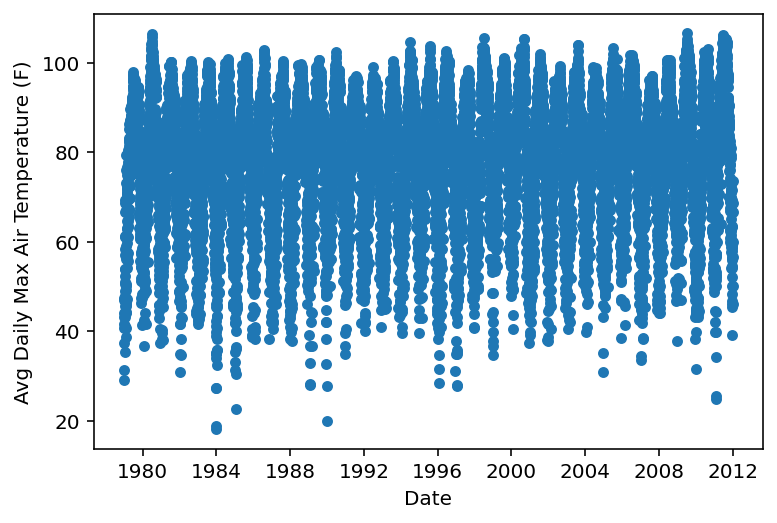

In [19]:
df.plot.scatter(x='Date',y='Avg Daily Max Air Temperature (F)')

In [20]:
#Answer 4) ABOVE

>5) Describe your plot.

In [21]:
#Answer 5) The x-axis of this plot are the dates from 1979 to 2012. The y-axis is the average daily max air temperature. You can see in this plot how the dots are more spaced out at the lower temperatures, which is because there are less times where it is below 40 degrees in Texas. whereas it is more frequent to have higher temeratures around 80-100 degrees in Texas so there is more of a cluster of dots the higher the temperature.

### Adding colors for our graph

In [22]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

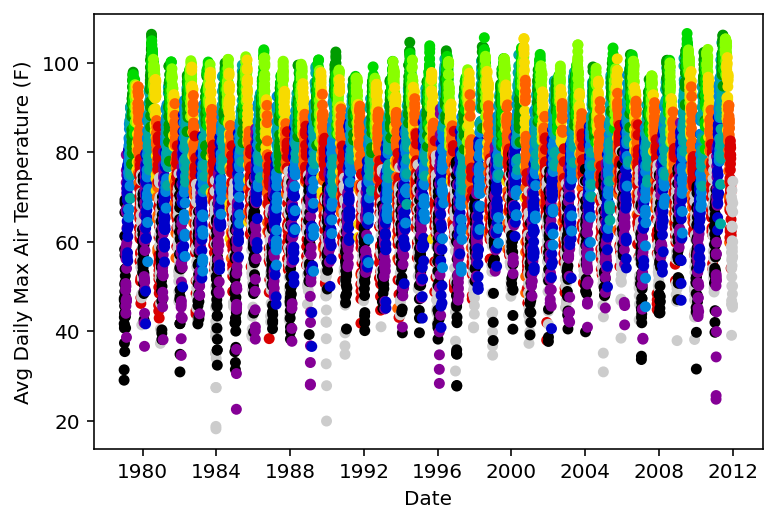

In [23]:
#6
df.plot.scatter(x='Date',y='Avg Daily Max Air Temperature (F)' ,c=df['color'])

In [24]:
#Answer 6)ABOVE

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [25]:
#7:
start_date=pd.datetime(1979,1,2)
end_date=start_date+pd.DateOffset(months=6)

In [26]:
selected_data=df[(df['Date']>=start_date)&(df['Date']<=end_date)]

In [27]:
selected_data

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Month,Day,Year,DateInt,color
1,"Jan 02, 1979",1979/01/02,31.35,1979-01-02,1,2,1979,2840832.0,#000000
2,"Jan 03, 1979",1979/01/03,41.66,1979-01-03,1,3,1979,2841696.0,#000000
3,"Jan 04, 1979",1979/01/04,47.30,1979-01-04,1,4,1979,2842560.0,#000000
4,"Jan 05, 1979",1979/01/05,46.89,1979-01-05,1,5,1979,2843424.0,#000000
5,"Jan 06, 1979",1979/01/06,43.10,1979-01-06,1,6,1979,2844288.0,#000000
...,...,...,...,...,...,...,...,...,...
178,"Jun 28, 1979",1979/06/28,94.53,1979-06-28,6,28,1979,2993760.0,#009c00
179,"Jun 29, 1979",1979/06/29,96.58,1979-06-29,6,29,1979,2994624.0,#009c00
180,"Jun 30, 1979",1979/06/30,97.87,1979-06-30,6,30,1979,2995488.0,#009c00
181,"Jul 01, 1979",1979/07/01,97.32,1979-07-01,7,1,1979,2996352.0,#00da00


In [28]:
#Answe 7) ABOVE

>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

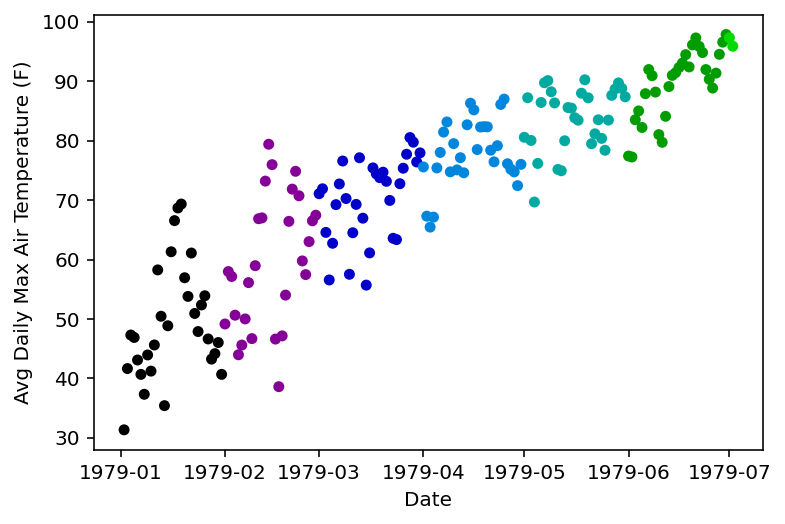

In [29]:
#8:
selected_data.plot.scatter(x='Date',y='Avg Daily Max Air Temperature (F)' ,c=selected_data['color'])

In [30]:
#Answer 8) ABOVE

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [31]:
X=selected_data['DateInt'].values
Y=selected_data['Avg Daily Max Air Temperature (F)'].values

In [32]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [33]:
Y_pred = lin_reg(X,Y)

0.0003132199273570075 -842.1497269916032


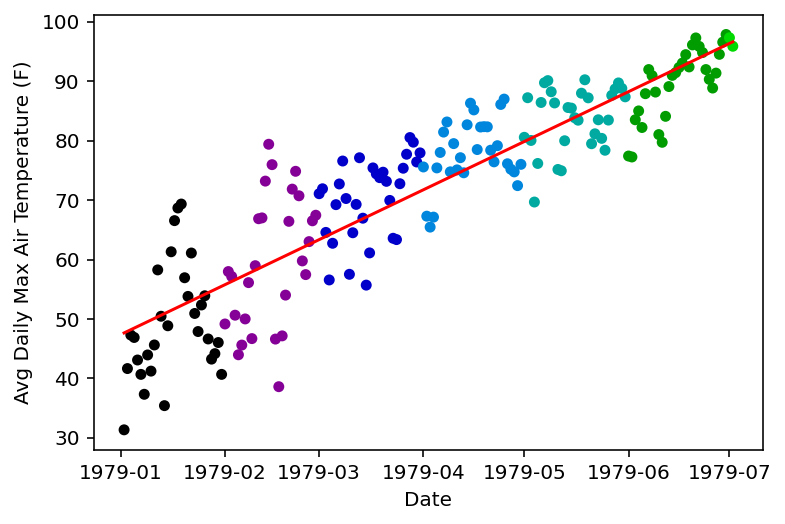

In [34]:
selected_data.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=selected_data['color'])
plt.plot([min(selected_data['Date'].values), max(selected_data['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

In [35]:
#9
import numpy as np
from scipy import stats

In [36]:
slope, intercept, r_value, p_value, std_err=stats.linregress(X,Y)
print ("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.0003132199273570075
Intercept: -842.1497269916032


In [37]:
#Answer 9) ABOVE

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [38]:
#10
min_X=np.min(X)
max_X=np.max(X)

In [39]:
min_Y=slope*min_X+intercept
max_Y=slope*max_X+intercept

In [40]:
#Answer 10) BELOW
print("Minimum Y value:",min_Y)
print("Maximum Y value:",max_Y)

Minimum Y value: 47.65546568185914
Maximum Y value: 96.6380508016573


In [41]:
#Answer 10) BELOW
if slope>0:
    print("Positive slope.")
elif slope<0:
    print("Negative slope.")
else:
    print("Slope zero.")

Positive slope.


## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [42]:
#11
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values

In [43]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [44]:
Y_pred = lin_reg(X,Y)

3.072410840971274e-07 75.67019246681011


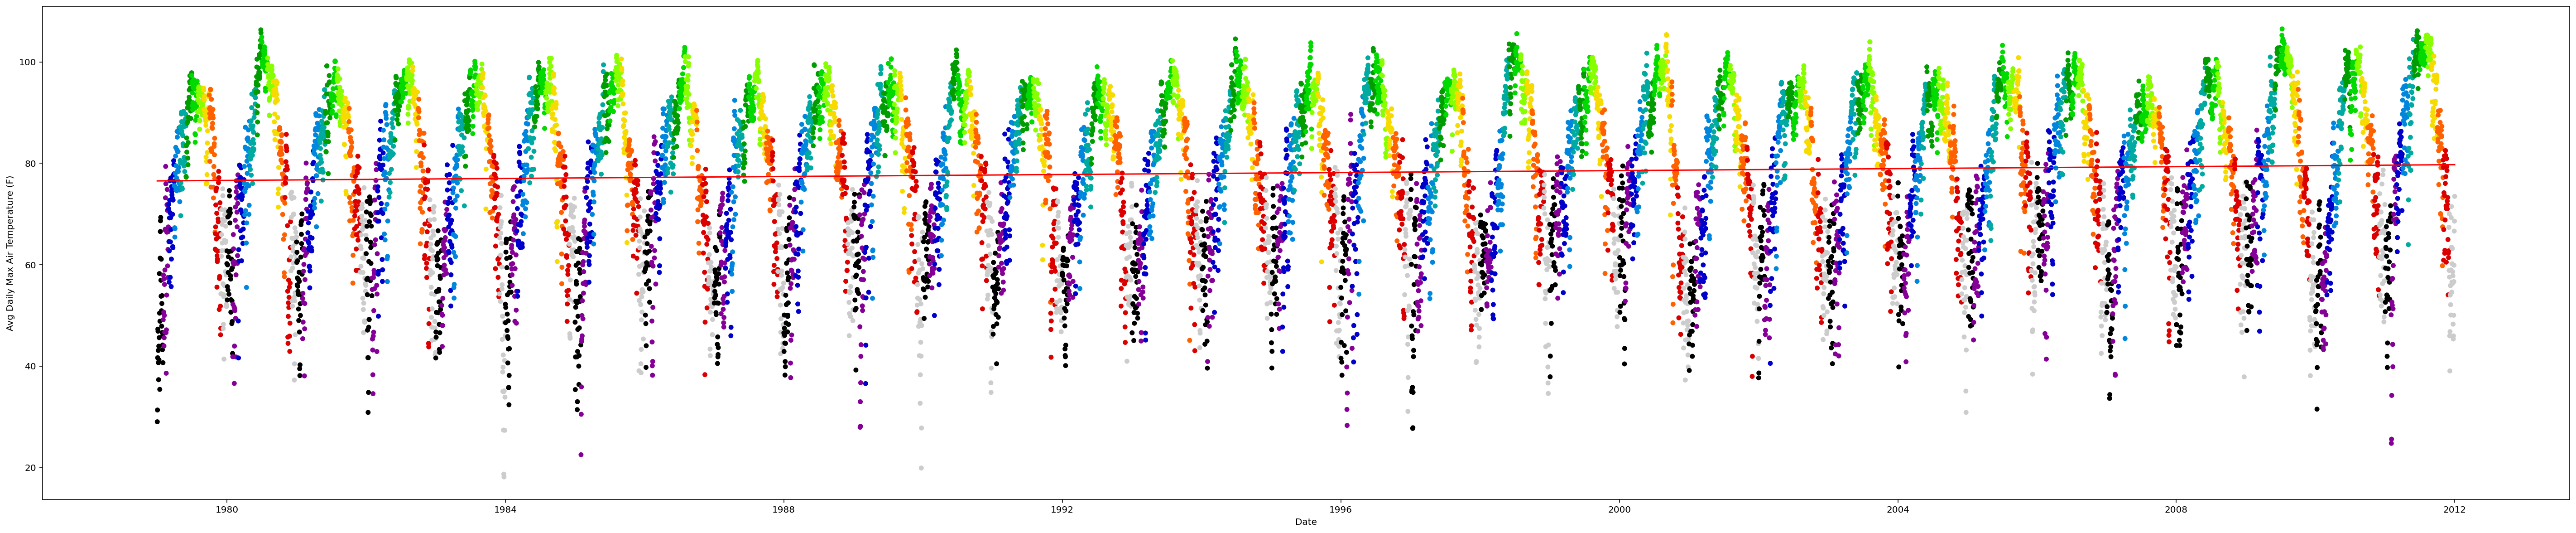

In [55]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=df['color'], figsize=(50,10))
plt.plot([min(df['Date'].values), max(df['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

In [ ]:
#Answer 11) ABOVE

>12) Is the slope positive or negative? What do you think that means?

In [ ]:
#Answer 12) BELOW
if slope>0:
    print("Positive slope.")
elif slope<0:
    print("Negative slope.")
else:
    print("Slope zero.")

In [ ]:
#Answer 12) BELOW
#The slope is positive meaning that as the years increase so does the average daily max air temperature. So there has been a steady rise in temperature in Texas over the years.